In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import os

# initial directory 
os.getcwd() 
os.chdir(r"C:\Users\USER\Desktop\imarticus\machine learning\Assesment\KNN + SVM + Naive Bayes + PCA") 

In [3]:
df=pd.read_csv(r"Wine.csv",header=0)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#  Compute and plot those feature which are related to each other

<AxesSubplot:>

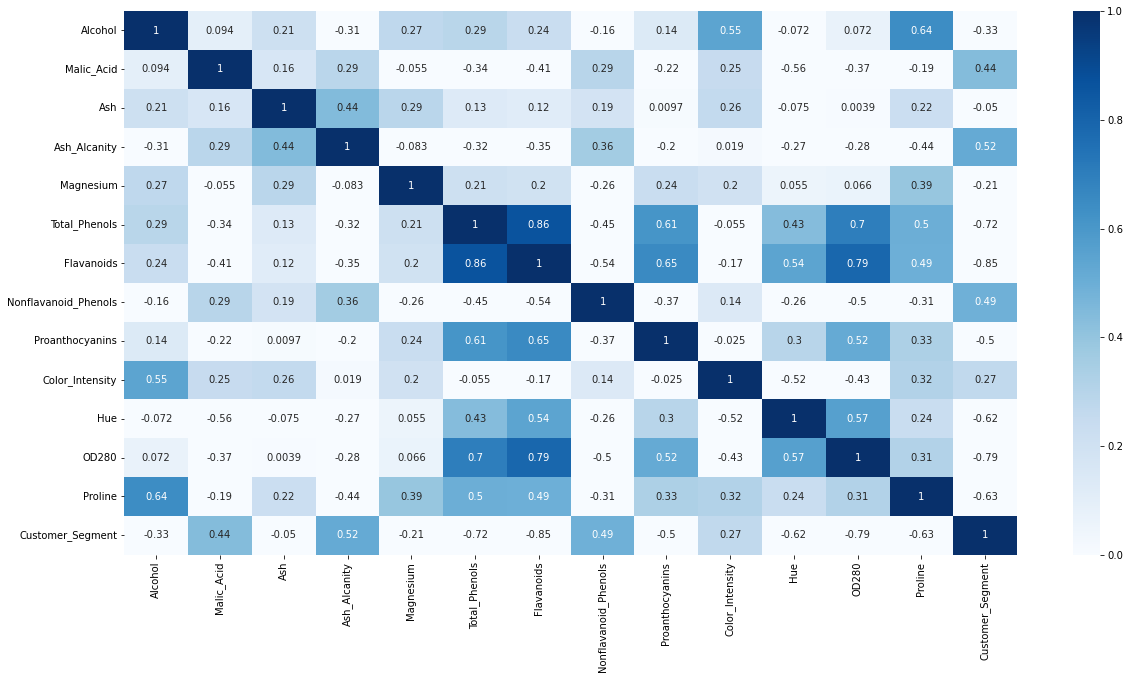

In [4]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmin=0,vmax=1,cmap="Blues",annot=True)

- Flavanoids has high corelation Total_Phenols and OD280
- OD280 has high corelation Total_Phenols and Flavanoids

#  What are the optimum number of principal components in PCA

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [27]:
x=df.drop(['Customer_Segment'],axis=1) # independent variable
y=df['Customer_Segment']    # dependent variable

In [7]:
x.shape

(178, 13)

In [8]:
y.shape

(178,)

In [28]:
# Making the data in same range -3 to +3
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [29]:
# splitting ther data in train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [11]:
# appling PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.37156174 0.2019533  0.10959523 0.06202959 0.05758885 0.05272733
 0.03940884 0.02534848 0.0211269  0.01982826 0.0180694  0.01202182
 0.00874027]


- output of PCA will give the how much import is the variable 
- so will building the model we will consider only that variable 

In [12]:
0.37156174+0.2019533+0.10959523+0.06202959+0.05758885+0.05272733+0.03940884+0.02534848+0.0211269


0.9413402599999999

In [13]:
# appling PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.37156174 0.2019533  0.10959523 0.06202959 0.05758885 0.05272733
 0.03940884 0.02534848 0.0211269  0.01982826]


In [30]:
pca.n_components_ # According to the PCA only 10 variable will give the good result 

10

#  Build a KNN classifier considering optimal number of principal components and value of K and state its score. 

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
my_dict={}
for k in range(1,31):
    model_KNN=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model_KNN.fit(x_train,y_train)
    y_pred=model_KNN.predict(x_test)
    print("accuracy is", accuracy_score(y_test,y_pred),'for k-value:', k)
    my_dict[k]=accuracy_score(y_test,y_pred)

accuracy is 0.9166666666666666 for k-value: 1
accuracy is 0.9166666666666666 for k-value: 2
accuracy is 0.9444444444444444 for k-value: 3
accuracy is 0.9166666666666666 for k-value: 4
accuracy is 0.9166666666666666 for k-value: 5
accuracy is 0.9444444444444444 for k-value: 6
accuracy is 0.9166666666666666 for k-value: 7
accuracy is 0.9166666666666666 for k-value: 8
accuracy is 0.9444444444444444 for k-value: 9
accuracy is 0.9166666666666666 for k-value: 10
accuracy is 0.9444444444444444 for k-value: 11
accuracy is 0.9444444444444444 for k-value: 12
accuracy is 0.9444444444444444 for k-value: 13
accuracy is 0.9444444444444444 for k-value: 14
accuracy is 0.9444444444444444 for k-value: 15
accuracy is 0.9444444444444444 for k-value: 16
accuracy is 0.9444444444444444 for k-value: 17
accuracy is 0.9444444444444444 for k-value: 18
accuracy is 0.9444444444444444 for k-value: 19
accuracy is 0.9444444444444444 for k-value: 20
accuracy is 0.8888888888888888 for k-value: 21
accuracy is 0.88888888

In [16]:
for i in my_dict:
    if my_dict[i]==max(my_dict.values()): # to get the best k value
        print(i,":",my_dict[i])

26 : 0.9722222222222222
27 : 0.9722222222222222
28 : 0.9722222222222222
29 : 0.9722222222222222
30 : 0.9722222222222222


In [17]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=26,metric='euclidean')
model_KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [18]:
y_pred2=model_KNN.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(y_test,y_pred2)
print(cfm)

print("classification_report:")

print(classification_report(y_test,y_pred2))

acc=accuracy_score(y_test,y_pred2)
print("accuracy of the model: ",acc*100)

[[10  0  0]
 [ 0 17  1]
 [ 0  0  8]]
classification_report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        18
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

accuracy of the model:  97.22222222222221


#  Accuracy of the model 97.22%

# SVM (Support Vector Machine)

In [20]:
# fitting svm to the dataset
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=10,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1]


In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#y_pred_new=svc_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 15  3]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.83      0.91        18
           3       0.73      1.00      0.84         8

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.94      0.92      0.92        36

0.9166666666666666


# Accuracy of the model 91.66% 

# Hyperparameters Tunning

In [22]:
# fitting svm to the dataset
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=1,gamma=0.1)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[2, 2, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 1]


In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#y_pred_new=svc_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0 16  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94        18
           3       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36

0.9444444444444444


# After Hyperparameter tuning the accuracy of the model is increase
# Accuracy of the model is 94.44%  

#  Naive Bayes Classifier  

In [24]:
from sklearn.naive_bayes import GaussianNB
model_NB=GaussianNB()
model_NB.fit(x_train,y_train)
y_pred=model_NB.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("classification_report:")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test,y_pred)*100
print("accuracy of the model: ",acc)

[[10  0  0]
 [ 0 17  1]
 [ 0  0  8]]
classification_report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      0.94      0.97        18
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36

accuracy of the model:  97.22222222222221


# Accuracy of the model  97.22% 

# Compare all of the models and justify  the optimum model. 

 - KNN and Naive Bayes Classifier has same accuracy of 97.22%
 - Type 2 error has is zero in both the algorithm
 - It has only one Type 1 error
 - But Naive Bayes Classifier will give us tha probability of the Classes
 - So on that Basis we can chose either KNN or Naive Bayes Classifier

# Finish 